# IMPORTING LIBRARY

In [1]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pycaret.regression import *
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [5]:
data=pd.read_excel('Tugas 3 STDA4101-2024.1.xlsx')

In [6]:
data.describe()

,AGE,BMI,BP,S1,Y
count,100.000000,100.000000,100.00000,100.000000,100.00000
mean,45.820000,25.398000,91.36660,180.910000,133.56000
std,13.688733,3.832476,13.31877,31.790061,69.17031
min,19.000000,18.600000,63.00000,97.000000,37.00000
25%,35.000000,22.850000,83.00000,158.000000,75.00000
50%,47.500000,24.950000,89.33500,181.500000,128.50000
75%,58.000000,27.500000,98.00000,198.000000,170.00000
max,72.000000,38.000000,131.00000,264.000000,341.00000


# DATA DEFINITION

Y: ukuran kuantitatif perkembangan penyakit setelah satu tahun amatan\
AGE: age in years\
BMI: body mass index\
BP: average blood pressure\
S1: total serum cholesterol

In [7]:
data.describe()

,AGE,BMI,BP,S1,Y
count,100.000000,100.000000,100.00000,100.000000,100.00000
mean,45.820000,25.398000,91.36660,180.910000,133.56000
std,13.688733,3.832476,13.31877,31.790061,69.17031
min,19.000000,18.600000,63.00000,97.000000,37.00000
25%,35.000000,22.850000,83.00000,158.000000,75.00000
50%,47.500000,24.950000,89.33500,181.500000,128.50000
75%,58.000000,27.500000,98.00000,198.000000,170.00000
max,72.000000,38.000000,131.00000,264.000000,341.00000


# PROBLEM STATEMENT

Problem : 
1. Bagaimana memprediksi perkembangan penyakit setelah satu tahun amatan secara akurat ?
2. Faktor apa yang paling memperngaruhi perkembangan penyakit setelah satu tahun amatan ?

ML Objective :
1. Membuat ML yang dapat memprediksi perkembangan penyakit setelah satu tahun amatan secara akurat
2. Membuat ML yang mampu mengidentifikasi Faktor yang paling memperngaruhi perkembangan penyakit setelah satu tahun amatan

# DATA CLEANING

# Missing value

In [8]:
data.isna().sum()

AGE    0
BMI    0
BP     0
S1     0
Y      0
dtype: int64

# Duplicate Values

In [9]:
data.duplicated().sum()

0

# Scatter plot

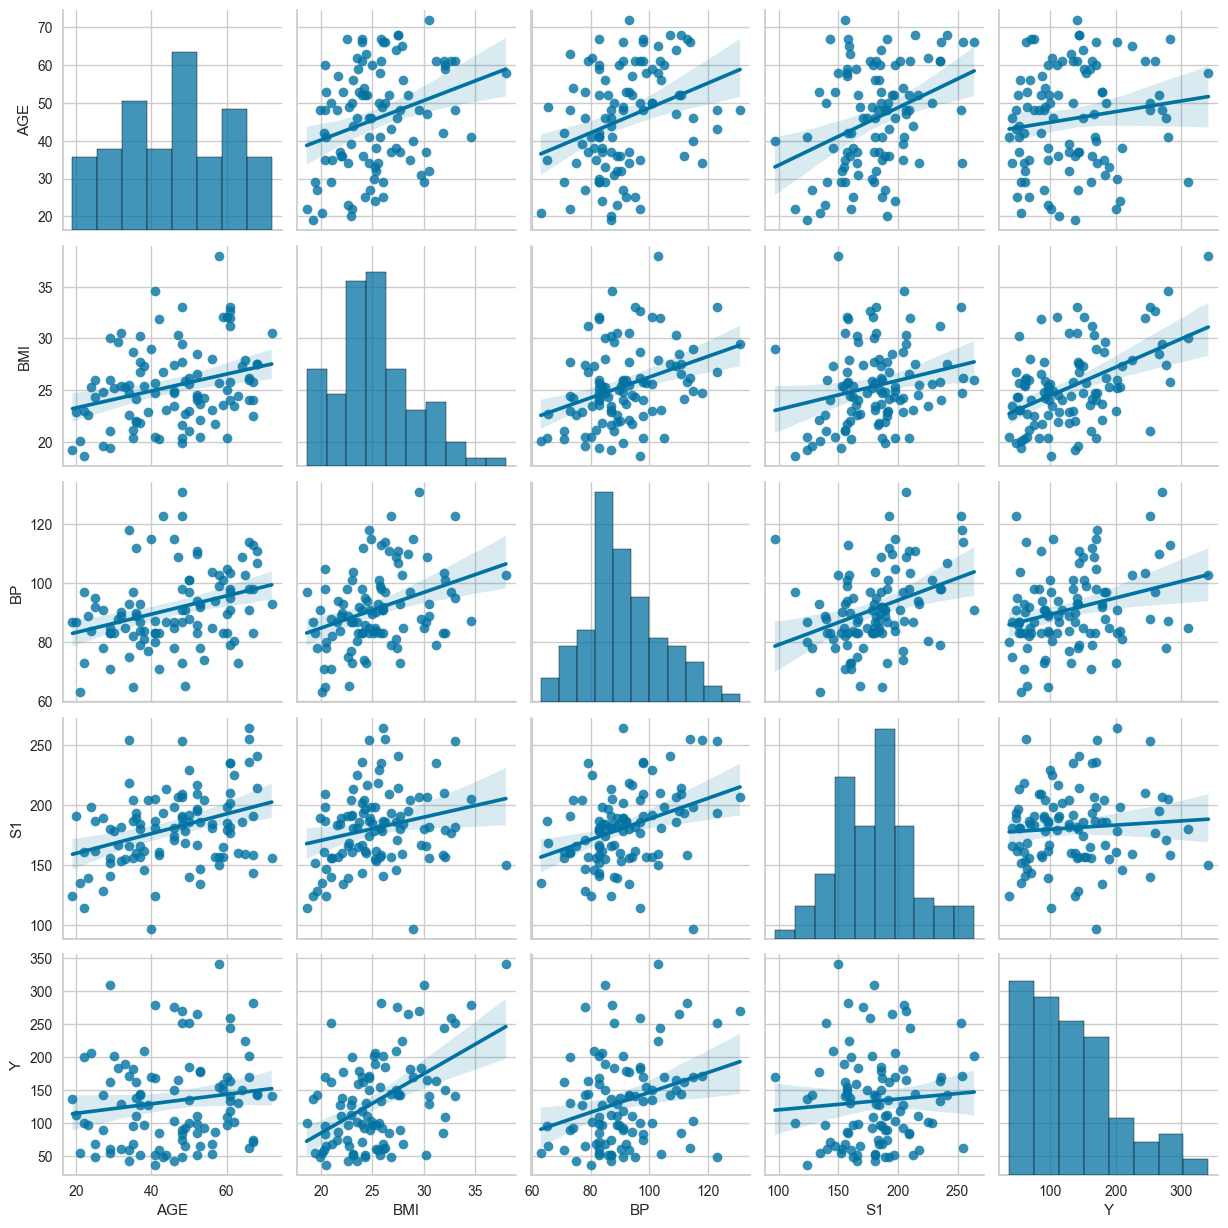

In [33]:
sns.pairplot(data=data, kind='reg')

# DATA MODELLING

# Pisahkan data test dan data train

In [12]:
X = data.drop(columns = "Y", axis=1)
y = data["Y"]

In [13]:
#Split Data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 123)

# EXPLORATORY DATA ANALYSIS

gabungkan X_train dan y_train untuk keperluan EDA

In [14]:
train=pd.merge(X_train, y_train, left_index=True, right_index=True)

correlation matrix

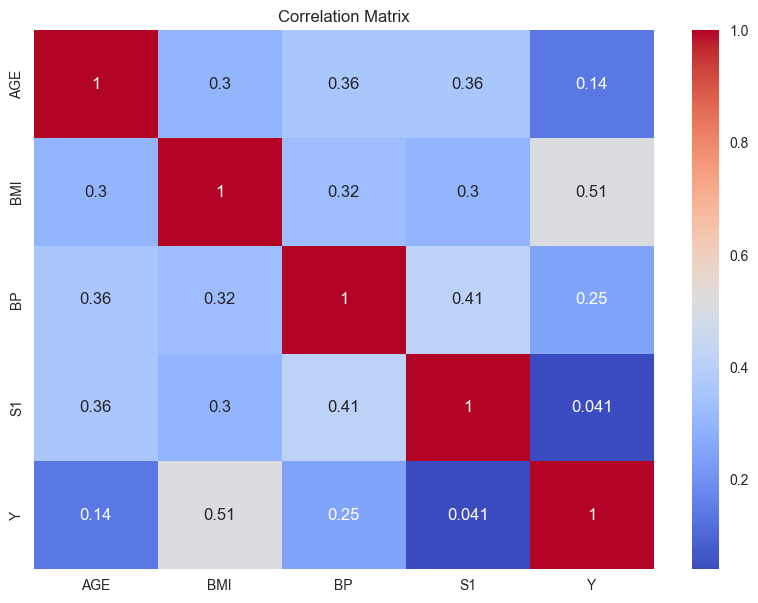

In [15]:
plt.figure(figsize=(10,7))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

histogram

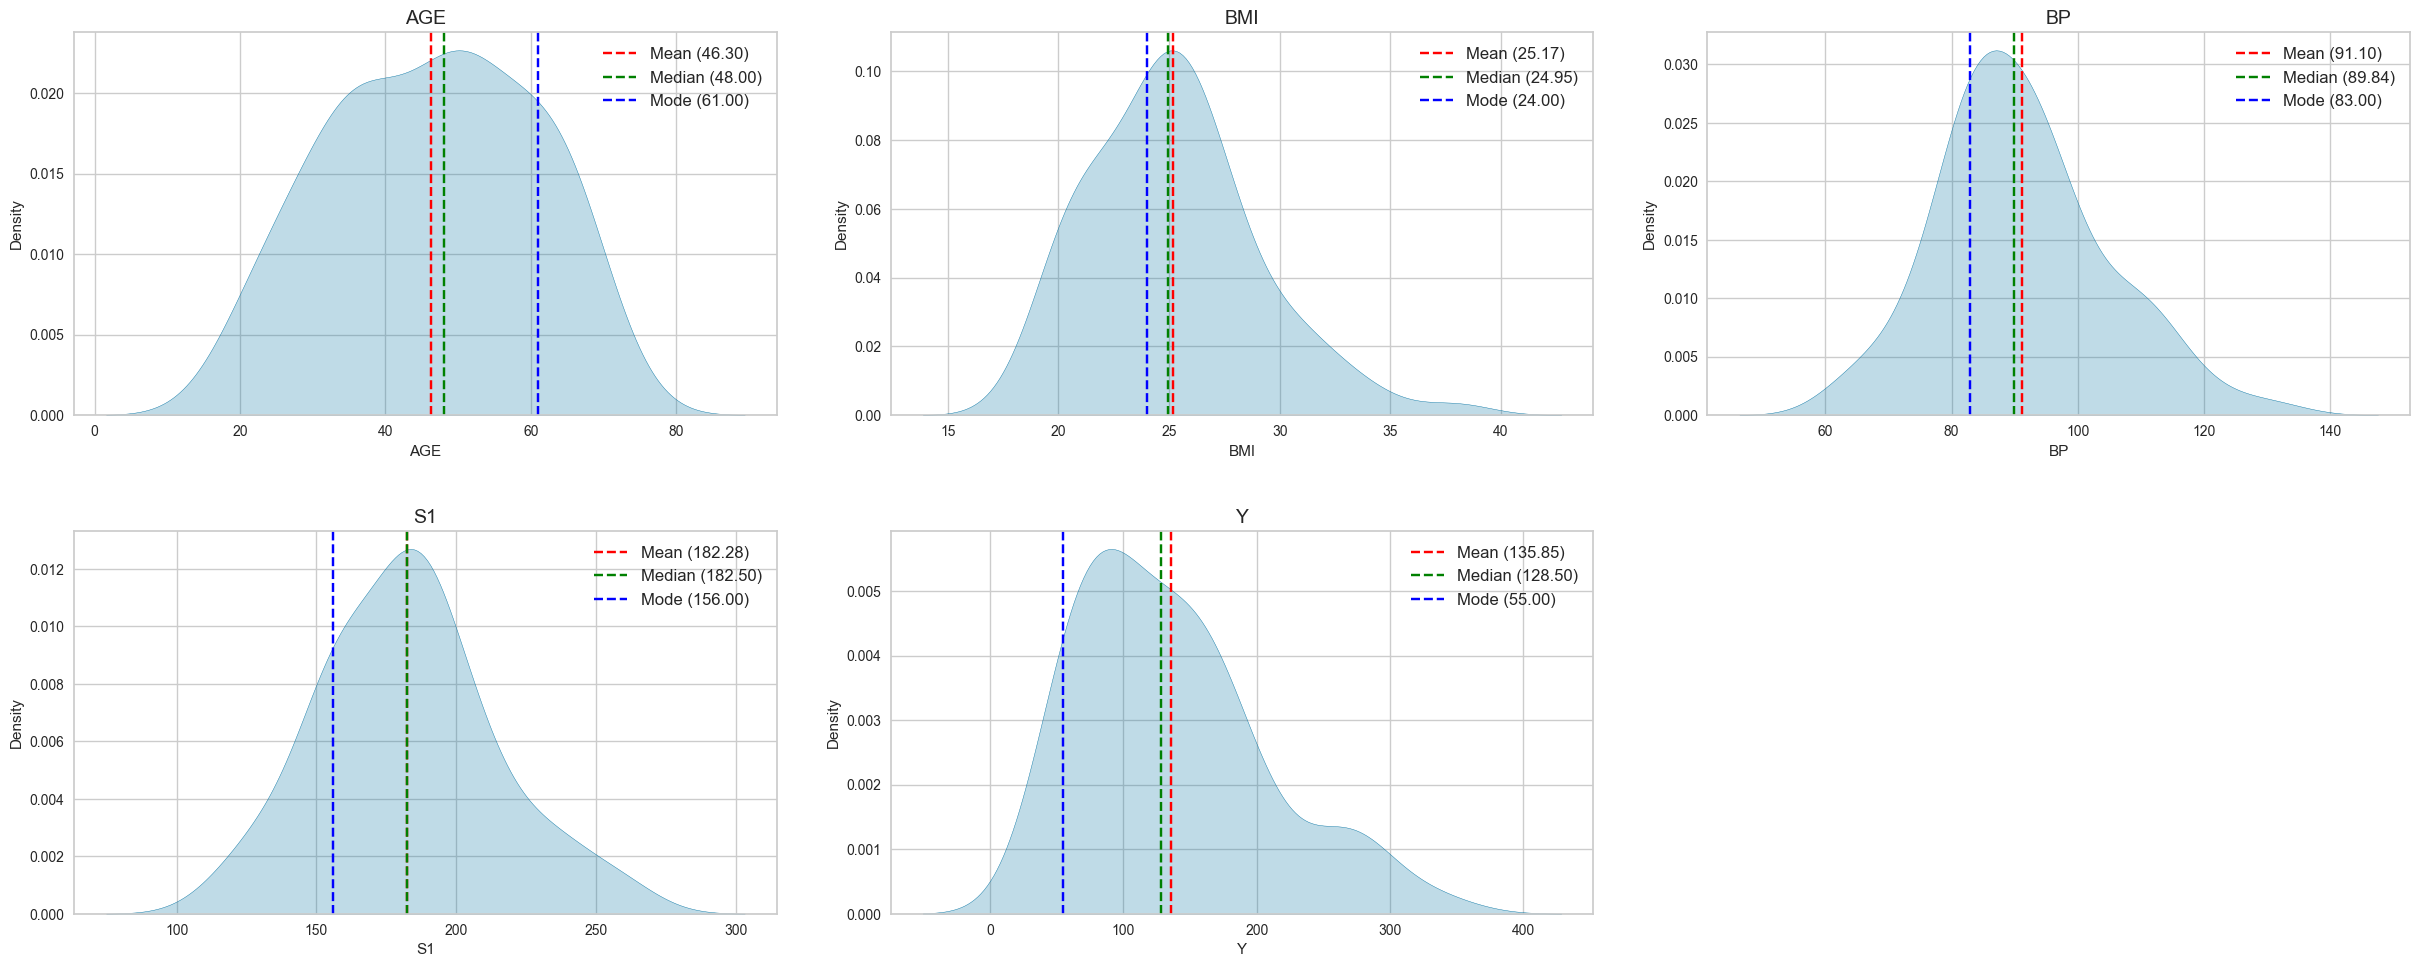

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Setting the number of rows and columns for subplots
num_rows = 5
num_cols = 3

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting the figure size
plt.figure(figsize=(25, 25))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in train.columns:
    if train[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)
        
        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(train[col], shade=True)
        
        # Calculating mean, median, and mode
        mean_val = train[col].mean()
        median_val = train[col].median()
        mode_val = stats.mode(train[col])[0]
        
        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val:.2f})')
        
        # Setting the title
        ax.set_title(col, fontsize=14)
        
        # Adding a legend
        plt.legend(fontsize=12)
        
        # Incrementing the subplot index
        subplot_index += 1

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()

AGE       Axes(0.125,0.653529;0.133621x0.226471)
BMI    Axes(0.285345,0.653529;0.133621x0.226471)
BP      Axes(0.44569,0.653529;0.133621x0.226471)
S1     Axes(0.606034,0.653529;0.133621x0.226471)
Y      Axes(0.766379,0.653529;0.133621x0.226471)
dtype: object

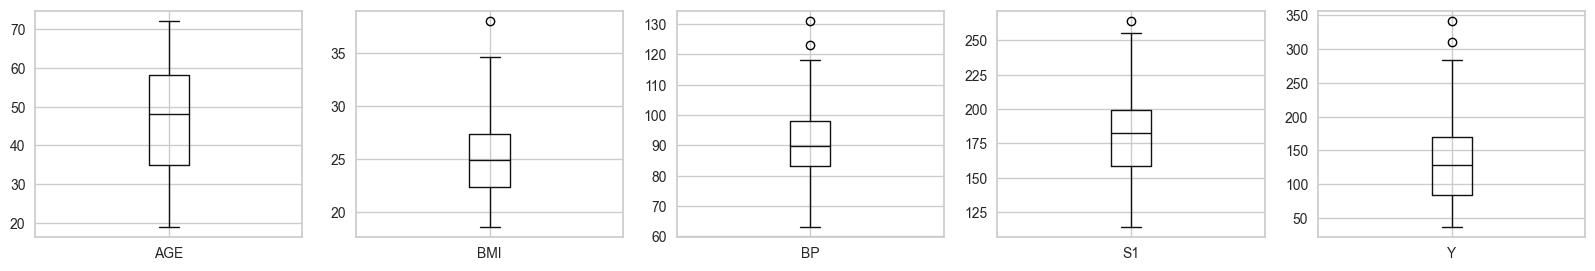

In [18]:
train.plot(kind='box', subplots=True, layout = (3,5), sharex = False, sharey = False, figsize = (20, 10), color = 'k')

# DATA MODELING

In [19]:
model = LinearRegression()

linreg = model.fit(X_train, y_train)

y_pred=linreg.predict(X_test)
y_pred_train=linreg.predict(X_train)

In [20]:
for col, coef in zip(X_train.columns, linreg.coef_):
    print('Column:{}, \tcoef:{}'.format(col, coef))

Column:AGE, 	coef:-0.03615070543715887
Column:BMI, 	coef:9.4967139953442
Column:BP, 	coef:0.8215238345247364
Column:S1, 	coef:-0.38640743459812477


In [21]:
X_1 = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_1)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.757
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.75e-05
Time:                        15:16:01   Log-Likelihood:                -439.20
No. Observations:                  80   AIC:                             888.4
Df Residuals:                      75   BIC:                             900.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -105.9372     59.270     -1.787      0.0

# MODEL EVALUATION

In [22]:
print('MSE train:', mean_squared_error(y_train, y_pred_train))
print('MAE train:',mean_absolute_error(y_train, y_pred_train))
print('MAPE train', mean_absolute_percentage_error(y_train, y_pred_train))

print('MSE test:', mean_squared_error(y_test, y_pred))
print('MAE test:',mean_absolute_error(y_test, y_pred))
print('MAPE test', mean_absolute_percentage_error(y_test, y_pred))

MSE train: 3435.968980262836
MAE train: 48.60816432360008
MAPE train 0.47127909543522506
MSE test: 3914.3948775788667
MAE test: 52.221208282605986
MAPE test 0.6804324863138129


# OTHER TECHNICS USING PYCARET

In [24]:
reg=setup(data=data, target='Y', session_id=123, train_size=0.7)

,Description,Value
0,Session id,123
1,Target,Y
2,Target type,Regression
3,Original data shape,"(100, 5)"
4,Transformed data shape,"(100, 5)"
5,Transformed train set shape,"(70, 5)"
6,Transformed test set shape,"(30, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [25]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,54.9887,4714.2646,64.5278,-0.6856,0.5084,0.5335,0.0080
en,Elastic Net,52.4541,4015.0995,61.6302,-0.7780,0.4919,0.5054,0.0080
llar,Lasso Least Angle Regression,52.4406,4009.0409,61.6630,-0.7974,0.4924,0.5048,0.0110
lasso,Lasso Regression,52.4406,4009.0393,61.6629,-0.7974,0.4924,0.5048,0.4180
ridge,Ridge Regression,52.4323,4008.6011,61.6820,-0.8021,0.4926,0.5048,0.0100
lr,Linear Regression,52.4316,4008.4534,61.6839,-0.8029,0.4926,0.5048,0.7040
omp,Orthogonal Matching Pursuit,55.6113,5030.4556,65.9571,-0.8029,0.5143,0.5366,0.0090
lar,Least Angle Regression,52.1279,3966.4113,61.4690,-0.8079,0.4919,0.5032,0.0090
br,Bayesian Ridge,54.4488,4757.6329,65.6017,-0.8311,0.5084,0.5133,0.0100
huber,Huber Regressor,53.4052,4244.5743,63.4190,-0.9079,0.5030,0.5088,0.0120


In [28]:
lar=create_model("lar")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.6533,2607.0710,51.0595,-0.2743,0.5048,0.5302
1,66.9826,5835.4631,76.3902,0.1923,0.5304,0.5147
2,33.4394,2108.6446,45.9200,-0.2597,0.4091,0.3993
3,49.8867,2651.4888,51.4926,0.4011,0.4296,0.4595
4,54.3332,3772.1977,61.4182,-0.4782,0.4866,0.4701
5,60.3417,4772.5748,69.0838,0.0632,0.5014,0.4739
6,50.8318,4295.3326,65.5388,-5.1973,0.5799,0.6930
7,35.8176,1634.0352,40.4232,-1.8486,0.3032,0.3052
8,71.2039,7627.9457,87.3381,-0.5009,0.4789,0.2925


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tunelar=tune_model(lar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.6533,2607.0710,51.0595,-0.2743,0.5048,0.5302
1,66.9826,5835.4631,76.3902,0.1923,0.5304,0.5147
2,33.4394,2108.6446,45.9200,-0.2597,0.4091,0.3993
3,49.8867,2651.4888,51.4926,0.4011,0.4296,0.4595
4,54.3332,3772.1977,61.4182,-0.4782,0.4866,0.4701
5,60.3417,4772.5748,69.0838,0.0632,0.5014,0.4739
6,50.8318,4295.3326,65.5388,-5.1973,0.5799,0.6930
7,35.8176,1634.0352,40.4232,-1.8486,0.3032,0.3052
8,71.2039,7627.9457,87.3381,-0.5009,0.4789,0.2925


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


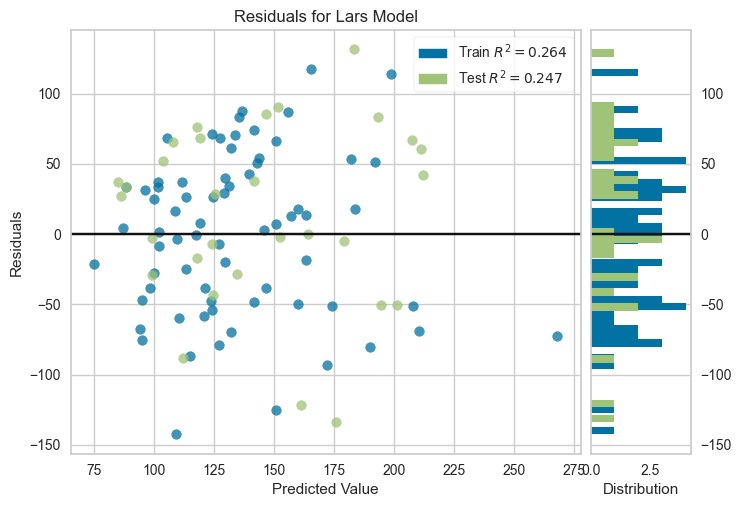

In [30]:
plot_model(tunelar)

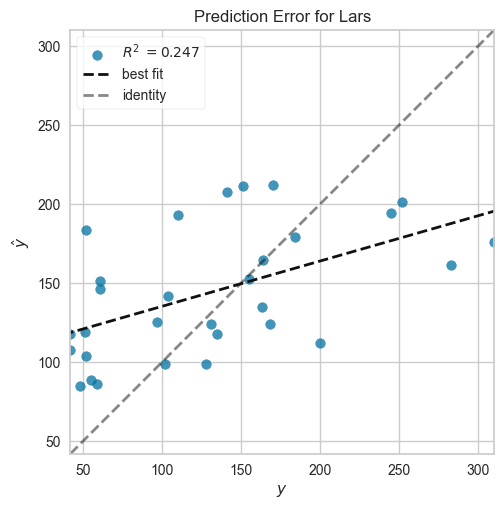

In [31]:
plot_model(tunelar, plot="error")